# Exploratory Data analysis on online retailer


Author: Marcus Said
Date: 23 October 2023

## Introduction

This dataset is from a UK-based and registered online retailer. The company mainly sells unique all-occasion gifts and many customers are wholesalers. It contains transanctions occuring from 01/12/2012 to 09/12/2011 and contains information of individual orders.

**Business Questions**

- Which products contribute the most to the total sales?
- How many customers make repeat purchases?
- Which country has the most sales?

**Who is reading this analysis?**

- I assume the owner of this retailer is not likely to be an expert in interpreting statistical analysis so the analysis will be in layman terms, avoiding complicated expressions.
- They need information and recommendations they can use to make profitable decisions regarding their business.

### 1. Data Loading and Exploration

In [1]:
import pandas as pd

# Load the dataset with encoding set to ISO-8859-1 to handle Latin characters
sales_data = pd.read_csv("C:/Users/mo/Desktop/data.csv", encoding='ISO-8859-1')

# Display the first few rows of the dataset
sales_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
# Display the last few rows of the dataset
sales_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


Each row represents an order of an item and the corresponding quantity, invoice number and date, stock code, unit price, customer id and geographical aspects.

In [3]:
sales_data.shape
# Display basic information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


This confirms that there are missing rows and as the amount of rows with missing data is large, I have chosen to fill in the empty description and customerid values with placeholders.

There are 541909 rows and 8 columns. From inspection it becomes clear columns Description and CustomerID have missing data.

### 2. Data cleaning

From inspection we already know there are missing values but we can still check nonetheless.

In [4]:
#Finding number of null values for all columns
sales_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
sales_data['Description'].fillna('Not Available', inplace=True)
sales_data['CustomerID'].fillna(-1, inplace=True)

Now checking for duplicate data.

In [6]:
sales_data.duplicated().sum()

5268

So there are 5268 rows of duplicated data as well. Quite concerning so let's take another look to see what's actually happening.

In [7]:
##
sales_data[sales_data.duplicated(keep = 'first')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


It looks like the duplicated function(?) believes there are multiple duplicates because of the columns, InvoiceNo, InvoiceDate, UnitPrice and CustomerID are the same but if you take a look at the 
Description you can clearly see there are differences in product so I've chosen to leave this be for the time being.

In [8]:
## Get a descriptive statistical summary 
sales_data.describe(include = "all")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,541909,541909.000000,541909,541909.000000,541909.000000,541909
unique,25900,4070,4224,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,11476.725404,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,6778.330409,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,-1.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,12352.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,14382.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16255.000000,NaN


There are 'NaN' in most of the cells but this is acceptable as it's not what I'm looking at for categorical columns. For some reason there are negative values in the minimum for quantity so I assume these are data errors as I have not seen anything mentioned about returns.

In [9]:
## Removing rows with the negative values for Quantity
sales_data = sales_data[sales_data['Quantity'] > 0]

# Exploratory Data Analysis

## 1. Which products contribute the most to the total sales?


The most obvious way to do this is to look at which product generates the most sales. However additional insight can be found from looking at the quantity of product sales and the relationship between volume and profit margins. By doing this we can create actionable insight for the stockholder, who can look at the cost-effectiveness of his products.

### Calculating best selling products

In [ ]:
# Calculates total sales for each product
sales_data['TotalSales'] = sales_data['Quantity'] * sales_data['UnitPrice']

# Groups sales by product and sum total sales
product_stats = sales_data.groupby(['StockCode', 'Description'])['TotalSales'].sum().reset_index()

# Sort products by total sales in descending order
sorted_products = product_stats.sort_values(by='TotalSales', ascending=False)

# Select the top N products (adjust as needed)
top_products = sorted_products.head(10)

top_products

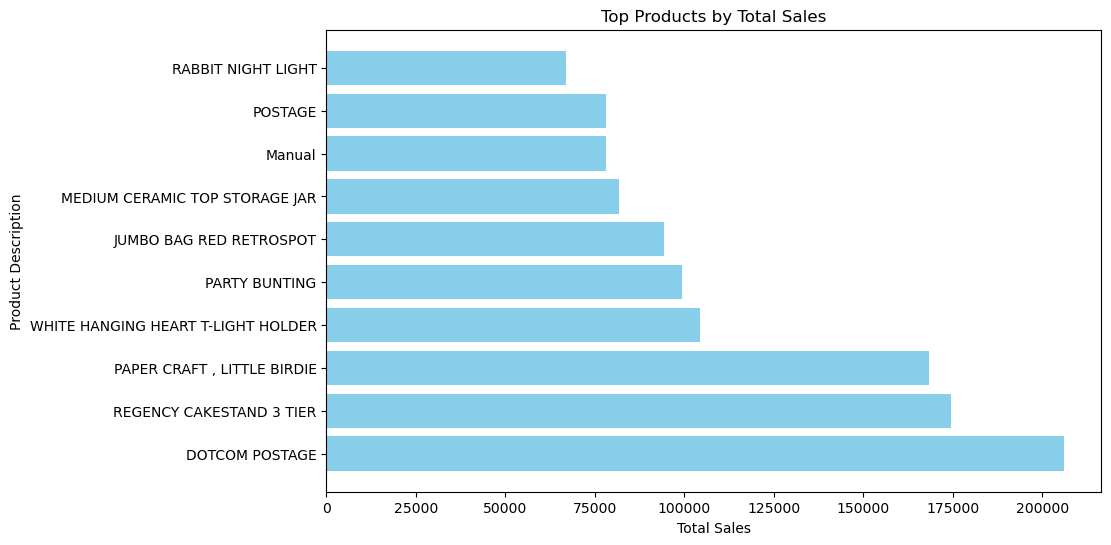

In [11]:
import matplotlib.pyplot as plt
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_products['Description'], top_products['TotalSales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.title('Top Products by Total Sales')
plt.show()

At first inspection it looks like something is wrong with the dataset as 'DOTCOM POSTAGE' and 'POSTAGE' are products. 

In [12]:
filtered_sales = sales_data[sales_data['Description'].str.contains('POSTAGE')]
filtered_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France,54.00
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands,15.00
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany,18.00
1814,536544,DOT,DOTCOM POSTAGE,1,12/1/2010 14:32,569.77,-1.0,United Kingdom,569.77
3041,536592,DOT,DOTCOM POSTAGE,1,12/1/2010 17:06,607.49,-1.0,United Kingdom,607.49
...,...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.00,12518.0,Germany,36.00
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/2011 10:26,1714.17,-1.0,United Kingdom,1714.17
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662.0,Germany,18.00
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526.0,Germany,36.00


I'm choosing to remove the StockCodes POST, Manual and DOT from the dataset because I don't think they are products nor will they give meaningful impressions to the stockholders.
I think it would be neater to do this in the cleaning section but for the sake of showing my thought process coherently I'll do it here.

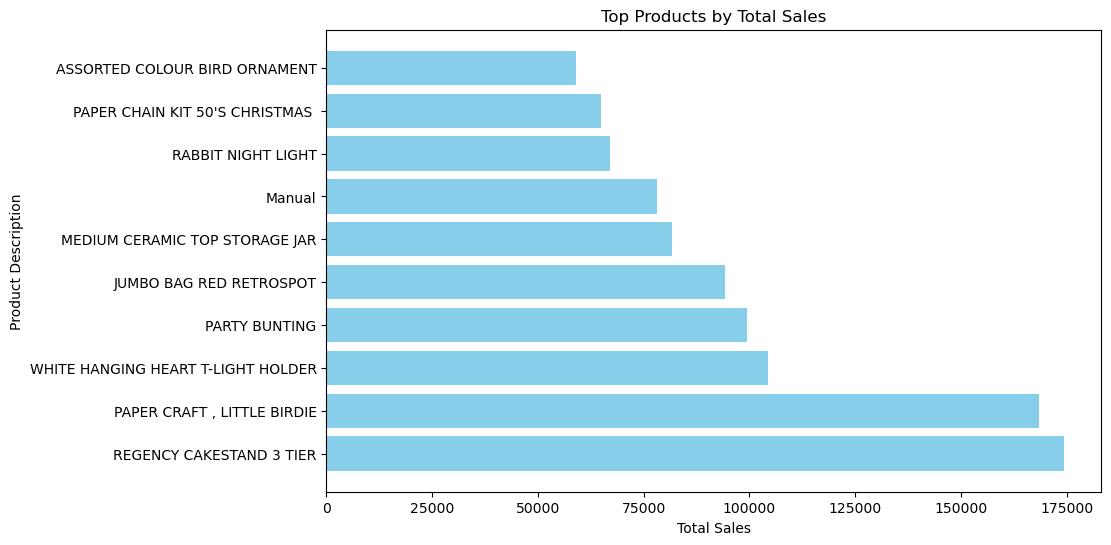

In [19]:
# Excludes rows with 'POST', 'DOT', 'AMAZON FEE', or 'M' in StockCode or 'AMAZON FEE' in Description
filtered_products = product_stats[~product_stats['StockCode'].str.contains('POST|DOT|AMAZON FEE|M|', case=False)]


# Sort products by total sales in descending order
sorted_products = product_stats.sort_values(by='TotalSales', ascending=False)

# Select the top N products (adjust as needed)
top_products = sorted_products.head(10)

# Creates a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['TotalSales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.title('Top Products by Total Sales')
plt.show()


Finally from inspection we can see which products are the best sellers so the stakeholders have multiple options from here.
For example they could have more promotions of best sellers, improve visibility of these items on the website and enter more.
---
### Calculating cost efficiency

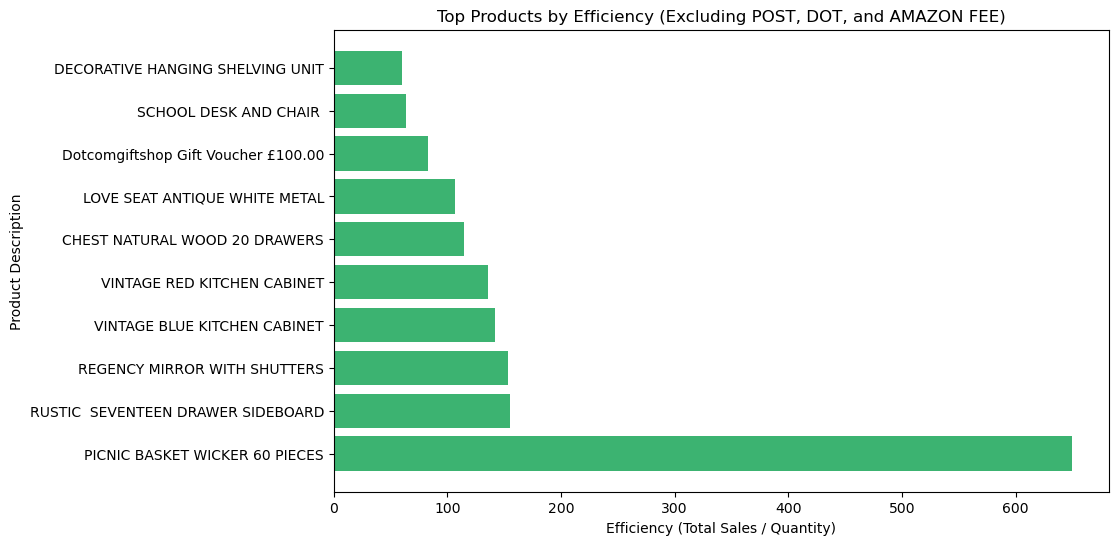

In [14]:
import matplotlib.pyplot as plt

# Calculate total sales and quantity for each product
sales_data['TotalSales'] = sales_data['Quantity'] * sales_data['UnitPrice']
product_stats = sales_data.groupby(['StockCode', 'Description']).agg({'TotalSales': 'sum', 'Quantity': 'sum'}).reset_index()

# Exclude rows with 'POST', 'DOT', or 'AMAZON FEE' in StockCode or 'AMAZON FEE' in Description
product_stats = product_stats[~product_stats['StockCode'].str.contains('POST|DOT|AMAZON FEE') & ~product_stats['Description'].str.contains('AMAZON FEE')]

# Calculate efficiency (total sales per quantity)
product_stats['Efficiency'] = product_stats['TotalSales'] / product_stats['Quantity']

# Sort products by efficiency in descending order
sorted_products = product_stats.sort_values(by='Efficiency', ascending=False)

# Select the top N products (adjust as needed)
top_products = sorted_products.head(10)

# Create a bar chart for efficiency
plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['Efficiency'], color='mediumseagreen')
plt.xlabel('Efficiency (Total Sales / Quantity)')
plt.ylabel('Product Description')
plt.title('Top Products by Efficiency (Excluding POST, DOT, and AMAZON FEE)')
plt.show()

With this graph the benefits of doing cost efficiency and best sellers become immediately clear. None of the best sellers are a top product for cost efficiency and this is a clear indicator for the stakeholders to take action in multiple different ways. One way could be to create cost efficient but similiar products of the best sellers, another would be to adjust prices of best sellers to improve cost efficiency without compromising market competitiveness.

# 2. How many customers make repeat purchases?


In [15]:
# Group data by customer and calculate total spending and quantity
customer_data = sales_data.groupby('CustomerID').agg({'TotalSales': 'sum', 'Quantity': 'sum', 'InvoiceNo': 'nunique'}).reset_index()

# Exclude customers with CustomerID = -1
customer_data = customer_data[customer_data['CustomerID'] != -1]

# Sort customers by total spending in descending order
sorted_customers = customer_data.sort_values(by='TotalSales', ascending=False)

# Select the top N customers (adjust as needed)
top_customers = sorted_customers.head(10)

# Create a grouped bar chart for total spending and total quantity
bar_width = 0.35
bar_positions = np.arange(len(top_customers['CustomerID']))

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(bar_positions, top_customers['TotalSales'], bar_width, color='skyblue', label='Total Spending')
bars2 = ax.bar(bar_positions + bar_width, top_customers['Quantity'], bar_width, color='mediumseagreen', label='Total Quantity')

ax.set_xlabel('Customer ID')
ax.set_ylabel('Amount')
ax.set_title('Top Customers by Total Spending and Quantity Purchased')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(top_customers['CustomerID'].astype(str))
ax.legend()

plt.show()


NameError: name 'np' is not defined

With this graph, there are a few things to consider and a few things recommendations for the stakeholder.

The first is that the highest spending customer has the highest quantity of products bought, and the second is that the second and third highest spending customers also have the lowest quantity of products bought.

This suggests the highest spending member buys a diverse group of products, while the second and third have niche but expensive preference.

With this in mind, one recommendation is to maintain and recommend a wide product selection for the highest paying customer, and for the second and third it would be better to promote high value items similar to what they have already purchased.

By giving personalised recommendations using this data, it can help build relationships between the most important customers and the business.

# 3. - Which country has the most sales?

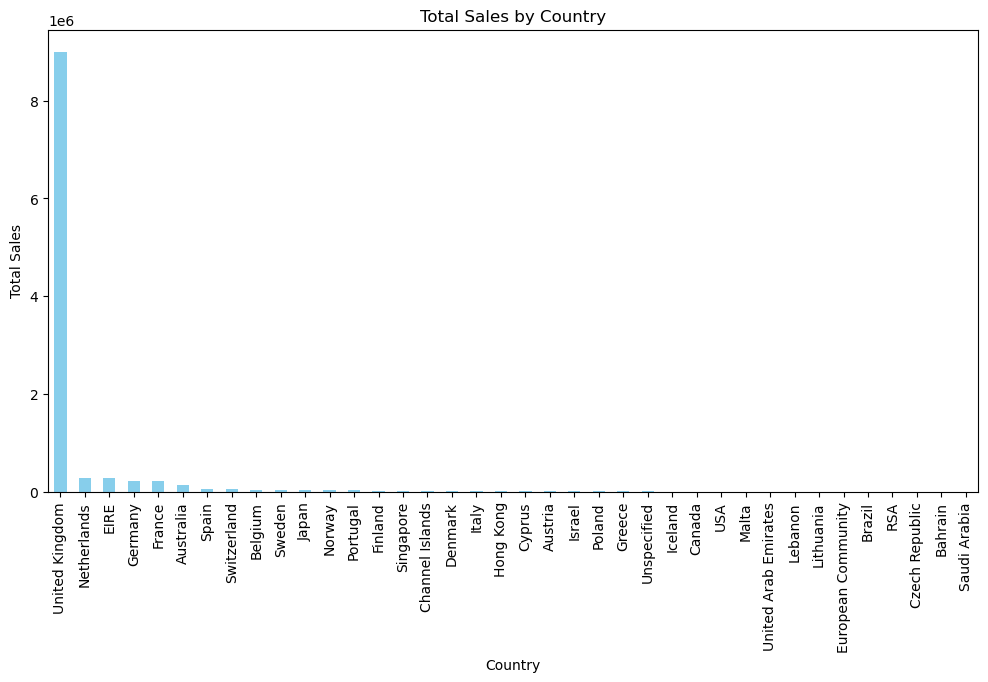

In [38]:
import matplotlib.pyplot as plt

# Group data by country and calculate total sales
country_sales = sales_data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.show()


Okay, the United Kingdom is by far and away the largest customer which makes looking at the rest of the countries a little hard to look at. 
I'm going to remove it to get a better look.

In [37]:
# Exclude the United Kingdom
country_sales = country_sales[1:]

# Plot a bar chart
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country (Excluding United Kingdom)')
plt.show()


NameError: name 'country_sales' is not defined

By inspection it's clear that the UK dominates sales. The stakeholder could choose
to identify more growth opportunities there.

With Ireland, Netherlands, France and Australia it could be a good idea to increase marketing and specifically tailor the products they see
in these countries to their preferences.

For the rest, it may be beneficial to reconsider the benefits of shipping and evaluate the profitablity. Alternatively, they could do independent market research to figure out how they can better enter the local market.

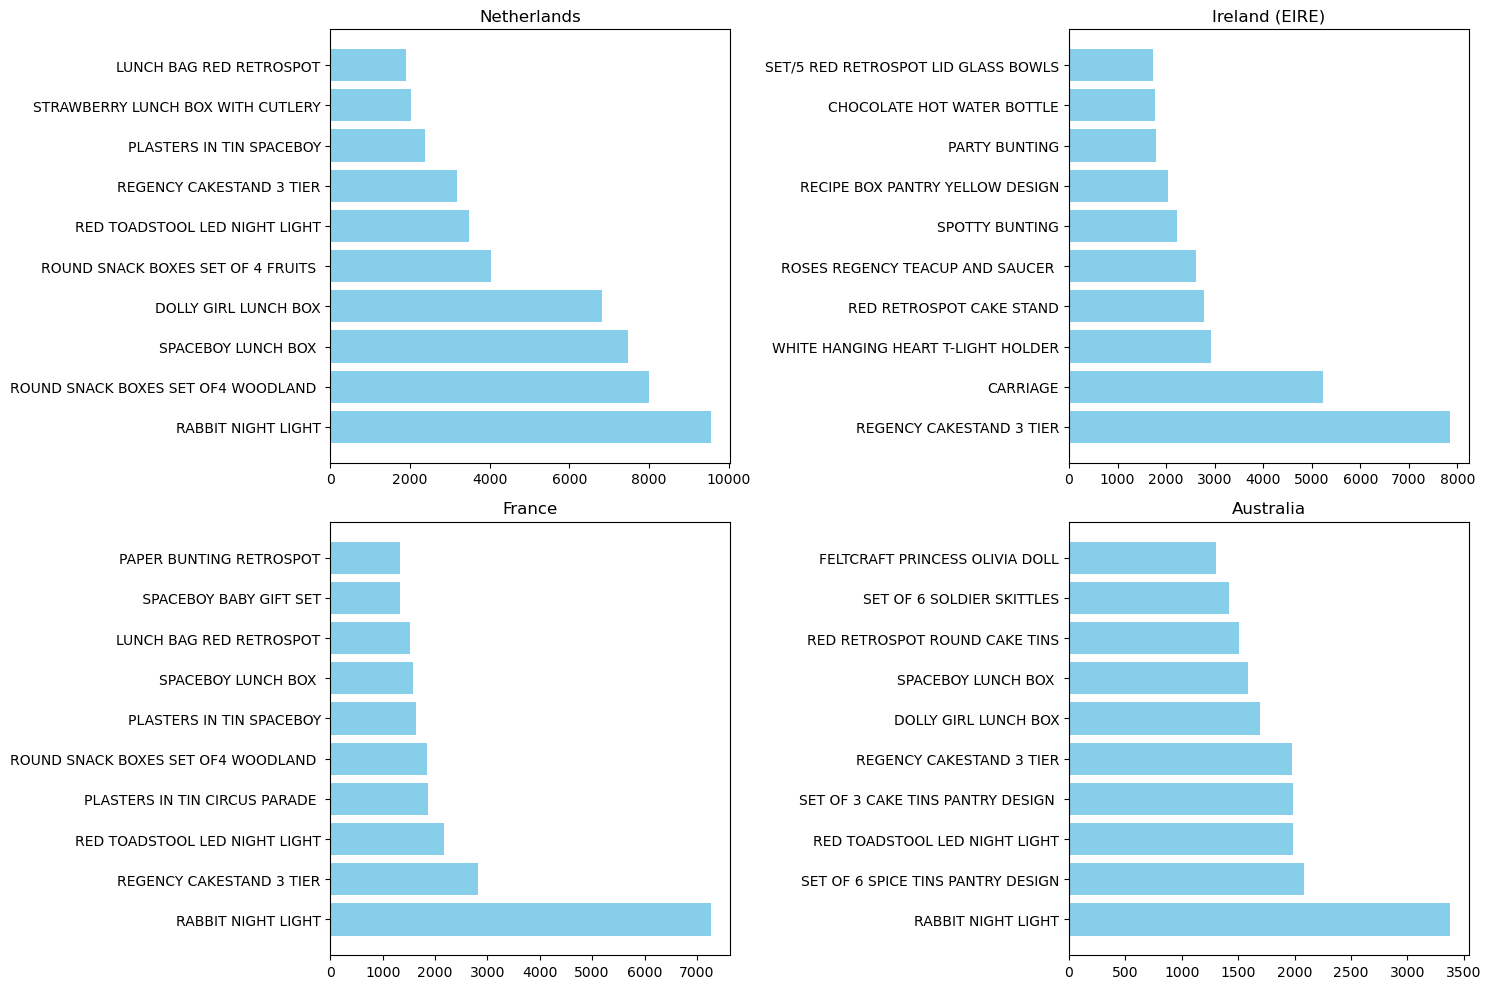

In [36]:

# Filter data for each country and exclude specific descriptions
france_data = sales_data[(sales_data['Country'] == 'France') & ~sales_data['Description'].str.contains('POST|DOT|AMAZON FEE|M', case=False)]
france_product_stats = france_data.groupby(['StockCode', 'Description'])['TotalSales'].sum().reset_index()
sorted_france_products = france_product_stats.sort_values(by='TotalSales', ascending=False)

ireland_data = sales_data[(sales_data['Country'] == 'EIRE') & ~sales_data['Description'].str.contains('POST|DOT|AMAZON FEE|M', case=False)]
ireland_product_stats = ireland_data.groupby(['StockCode', 'Description'])['TotalSales'].sum().reset_index()
sorted_ireland_products = ireland_product_stats.sort_values(by='TotalSales', ascending=False)

australia_data = sales_data[(sales_data['Country'] == 'Australia') & ~sales_data['Description'].str.contains('POST|DOT|AMAZON FEE|M', case=False)]
australia_product_stats = australia_data.groupby(['StockCode', 'Description'])['TotalSales'].sum().reset_index()
sorted_australia_products = australia_product_stats.sort_values(by='TotalSales', ascending=False)

netherlands_data = sales_data[(sales_data['Country'] == 'Netherlands') & ~sales_data['Description'].str.contains('POST|DOT|AMAZON FEE|M', case=False)]
netherlands_product_stats = netherlands_data.groupby(['StockCode', 'Description'])['TotalSales'].sum().reset_index()
sorted_netherlands_products = netherlands_product_stats.sort_values(by='TotalSales', ascending=False)

# Assuming you have calculated sorted_netherlands_products, sorted_ireland_products, sorted_france_products, and sorted_australia_products

# Select the top N products for each country
top_products_netherlands = sorted_netherlands_products.head(10)
top_products_ireland = sorted_ireland_products.head(10)
top_products_france = sorted_france_products.head(10)
top_products_australia = sorted_australia_products.head(10)

# Create subplots for each country
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot for the Netherlands
axes[0, 0].barh(top_products_netherlands['Description'], top_products_netherlands['TotalSales'], color='skyblue')
axes[0, 0].set_title('Netherlands')

# Plot for Ireland (EIRE)
axes[0, 1].barh(top_products_ireland['Description'], top_products_ireland['TotalSales'], color='skyblue')
axes[0, 1].set_title('Ireland (EIRE)')

# Plot for France
axes[1, 0].barh(top_products_france['Description'], top_products_france['TotalSales'], color='skyblue')
axes[1, 0].set_title('France')

# Plot for Australia
axes[1, 1].barh(top_products_australia['Description'], top_products_australia['TotalSales'], color='skyblue')
axes[1, 1].set_title('Australia')

# Adjust layout
plt.tight_layout()
plt.show()


# Strategic recommendations

Here, I revisit the business questions and give a summary of recommendations.

**Business Questions**

- Which products contribute the most to the total sales?
- How many customers make repeat purchases?
- Which country has the most sales?


**Recommendations**
- Focus on top-selling products like the Regency Cake Stand presents an opportunity for strategic product bundling. Pairing these popular items with less profitable products can create attractive bundles and offset losses/boost profits.
- Stakeholders should consider efficiency, stakeholders should explore the possibility of introducing more affordable alternatives to top-selling products. This widens the customer base and increases profit.
- For markets like France, Australia, and the Netherlands, where nightlights and lunch boxes emerge as popular trends, a deeper investigation into cultural nuances and local competitors is recommended. 